<a href="https://colab.research.google.com/github/ishidesigns/AI-Minor/blob/main/MNIST_Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


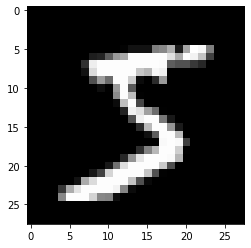

In [4]:
plt.imshow(x_train[0], cmap='gray')

In [5]:
type(y_train)

numpy.ndarray

In [6]:
import numpy as np
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [7]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [8]:
28*28/2

392.0

In [9]:
# Normalization 
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(392,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2066 - accuracy: 0.9399
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0828 - accuracy: 0.9746
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0548 - accuracy: 0.9829
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0384 - accuracy: 0.9877
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0287 - accuracy: 0.9906
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0225 - accuracy: 0.9928
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0164 - accuracy: 0.9946
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0141 - accuracy: 0.9955
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0131 - accuracy: 0.9954
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.009

In [19]:
y_pred = model.predict_classes(x_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [20]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9785

In [22]:
confusion_matrix(y_test,y_pred)

array([[ 975,    1,    0,    0,    1,    0,    2,    1,    0,    0],
       [   3, 1123,    2,    2,    0,    0,    1,    1,    3,    0],
       [   7,    3,  995,    8,    1,    0,    3,   10,    4,    1],
       [   1,    0,    0,  990,    0,    1,    0,    4,    3,   11],
       [   5,    0,    2,    2,  954,    0,    4,    2,    1,   12],
       [   4,    0,    0,    9,    0,  869,    4,    2,    2,    2],
       [   7,    2,    1,    1,    2,    2,  941,    0,    2,    0],
       [   4,    1,    4,    3,    0,    0,    0, 1011,    2,    3],
       [  10,    0,    6,    2,    2,    2,    1,    3,  941,    7],
       [   2,    2,    0,    4,    6,    3,    0,    4,    2,  986]])

In [23]:
# Save the model
model.save('mnist.h5')